In [1]:
# Notebook for estimating development from Rt and cases
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#Settings for plotting
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

# %matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")

## Useful commands to copy:
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

import os
import math

from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Load the admitted file to get weekly number and dates 
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [3]:
# Go through the weekly files and get number of cases
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"/" + ssidatapath

dfCase = pd.DataFrame(columns=dfAdm.columns)
# dfTest = pd.DataFrame(columns=dfAdm.columns)
# dfPosP = pd.DataFrame(columns=dfAdm.columns)

for k in range(0,len(curDates)):
    
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    #print(curFilePath)
    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        # dfTest.loc[curIndex] = curdf['Antal_testede'].values
        # dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print("file_not_found:")
        print(curFilePath)


file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv


In [4]:
# Calculate the weekly change
dfCaseDiff = dfCase.diff().iloc[1:]
# Modify the data to suit the actual vaccinated groups:
dfCaseDiff["10-19"] = dfCaseDiff["10-19"].apply(lambda x: int(0.4*x))
# Get the names of the age-groups
allCols = dfCase.columns
# Format the dates into datetime
plotDates =  pd.to_datetime(dfCaseDiff.index,format='%d_%m_%Y')
# Print the latest results to check
dfCaseDiff.tail()

Aldersgruppe  0-9  10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89 90+ I alt
13_04_2021    396    342   939   662   638   575   271   162    45   7  4552
20_04_2021    582    395   982   785   746   644   301   137    21  10  5196
27_04_2021    520    362   889   724   755   656   289   112    30   4  4885
04_05_2021    477    390  1204   836   827   699   372   120    16   6  5532
11_05_2021    503    538  1416   942   926   786   377   107    26   1  6431

In [5]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')
DK_age = []


#a_list = list(range(0, 100, 10))
#for i, a in enumerate(a_list):
#    if a == a_list[-1]:
#        DK_age.append(dfAges.iloc[a:].Antal.sum())
#    else:
#        DK_age.append(dfAges.iloc[a:a_list[i+1]].Antal.sum())
#DK_age.append(dfAges.Antal.sum())

DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[16:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age.append(dfAges.Antal.sum())


DK_age = np.array(DK_age)
DK_age

case_hosp_rate = np.array([i/100 for i in [0, 1, 2, 4, 6, 8, 13, 22, 40, 40]])

# 0-29, 30-69, 70-
immune_rate = np.array([0.1]*3 + [0.07]*2 + [0.06]*5)

In [6]:
# Vaccinationskalender, manuelt aflæst 12/05-2021
vaccKal = pd.DataFrame()

neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
vaccKal['0-9'] = [neverDate,neverDate,neverDate]
vaccKal['10-19'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-14'),np.datetime64('2021-07-19')]
vaccKal['20-29'] = [np.datetime64('2021-06-14'),np.datetime64('2021-07-19'),np.datetime64('2021-08-31')]
vaccKal['30-39'] = [np.datetime64('2021-06-21'),np.datetime64('2021-08-01'),np.datetime64('2021-08-31')]
vaccKal['40-49'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-28'),np.datetime64('2021-08-02')]
vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-05-31'),np.datetime64('2021-07-05')]
vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-24'),np.datetime64('2021-06-28')]
vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-04-26'),np.datetime64('2021-05-31')]
vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-03-29'),np.datetime64('2021-04-26')]
vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]
# vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
vaccKal['I alt'] = [neverDate,neverDate,neverDate]

vaccKal

0-9      10-19      20-29      30-39      40-49      50-59  \
0 2021-10-30 2021-05-24 2021-06-14 2021-06-21 2021-05-24 2021-05-03   
1 2021-10-30 2021-06-14 2021-07-19 2021-08-01 2021-06-28 2021-05-31   
2 2021-10-30 2021-07-19 2021-08-31 2021-08-31 2021-08-02 2021-07-05   

       60-69      70-79      80-89        90+      I alt  
0 2021-04-05 2021-03-29 2021-02-01 2021-02-01 2021-10-30  
1 2021-05-24 2021-04-26 2021-03-29 2021-02-22 2021-10-30  
2 2021-06-28 2021-05-31 2021-04-26 2021-03-15 2021-10-30

In [7]:
# Get the daily cases (Run young_age_groups to save new csv)
dfCaseDiffDaily = pd.read_csv('DailyCasesAveraged.csv')

# Get the corresponding dates
curDatesDaily = pd.to_datetime(dfCaseDiffDaily.Dato).values
plotDatesDaily = np.arange(curDatesDaily[0],curDatesDaily[-1]+np.timedelta64(1,'D'),np.timedelta64(1,'D'))

# Adjust to vaccinated groups:
dfCaseDiffDaily["10-19"] = dfCaseDiffDaily["10-19"].apply(lambda x: x*0.4)

# Print to see the last days
dfCaseDiffDaily.tail()



Unnamed: 0        Dato         0-9       10-19  20-29  30-39       40-49  \
366         366  2021-05-08   66.333333   71.333333  174.0  118.0  122.666667   
367         367  2021-05-09   66.333333   71.333333  174.0  118.0  122.666667   
368         368  2021-05-10   66.333333   71.333333  174.0  118.0  122.666667   
369         369  2021-05-11  100.000000   78.400000  172.0  137.0  139.000000   
370         370  2021-05-12  103.000000  126.000000  256.0  176.0  151.000000   

          50-59      60-69  70-79     80-89  90+        I alt  
366  104.333333  47.333333   14.0  2.666667  0.0   827.666667  
367  104.333333  47.333333   14.0  2.666667  0.0   827.666667  
368  104.333333  47.333333   14.0  2.666667  0.0   827.666667  
369  100.000000  60.000000   14.0  6.000000  1.0   925.000000  
370  153.000000  69.000000   19.0  3.000000  1.0  1246.000000

In [8]:
def time_intervals(t_init, t_cur, t_final):
    tspan = np.timedelta64(t_final - t_init,'D')
    dt = np.timedelta64(pd.to_datetime(t_cur) - t_init,'D') 
    return dt/tspan, dt, tspan

def contact_number(t_list, vcal, RT):
    x1, x2, t_shift = 0.5, 0.95, np.timedelta64(14, "D")
    ret = np.zeros(np.shape(t_list))
    for i, t in enumerate(t_list):
        t = t-t_shift
        if t < vcal[0]:
            ret[i] = RT
        elif vcal[0] <= t < vcal[1]:
            rt, dt, tspan = time_intervals(vcal[0], t, vcal[1])
            ret[i] = RT*((1-rt) + rt*(1-x1))
        elif vcal[1] <= t < vcal[2]:
            rt, dt, tspan = time_intervals(vcal[1], t, vcal[2])
            ret[i] = RT*((1-rt)*(1-x1) + rt*(1-x2))
        elif vcal[2] <= t:
            ret[i] = RT*(1-x2)
        # print(ret[i])
    return ret

def predicted_cases(t_list, vcal, RT, gen_time=4.7/7, init_count=1, S0=100000):
    cn = contact_number(t_list, vcal, RT)
    ret = np.zeros(np.shape(cn))
    S = S0
    ret[0] = init_count
    dark_count = 2
    for i, c in enumerate(cn[1:], 1):
        dt = float(np.timedelta64(t_list[i]-t_list[i-1],"D")/np.timedelta64(7,"D"))
        #ret[i] = ret[i-1]*c**(gen_time*dt)
        ret[i] = ret[i-1]*(c**(gen_time*dt))*S/S0
        S = int(S > ret[i-1]*dark_count)*(S - ret[i-1]*dark_count)
    return ret

#def pct_dots(ax, xes, modelCounts, normConst, top=None):
#    pct_list = list(range(0,101,1))
#    modelCounts_cumul = modelCounts.cumsum()
#    if top == None:
#        top = max(modelCounts)*1.1
#    print(top)
#    for l in pct_list:
#        for j, c in enumerate(modelCounts_cumul[:-1]/normConst):
#            if (c <= l/100 < modelCounts_cumul[j+1]/normConst) and (modelCount[j+1] < top):
#                pct_str = f"{100*modelCounts_cumul[j+1]/normConst:.1f}%"
#                ax.plot(xes[j+1], modelCount[j+1], "+r")
#                ax.text(xes[j+1], modelCount[j+1]+25, pct_str, color="red", fontsize=14)

cmap_name = "viridis" # "rainbow" # "jet" # "cool" # 'plasma'


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


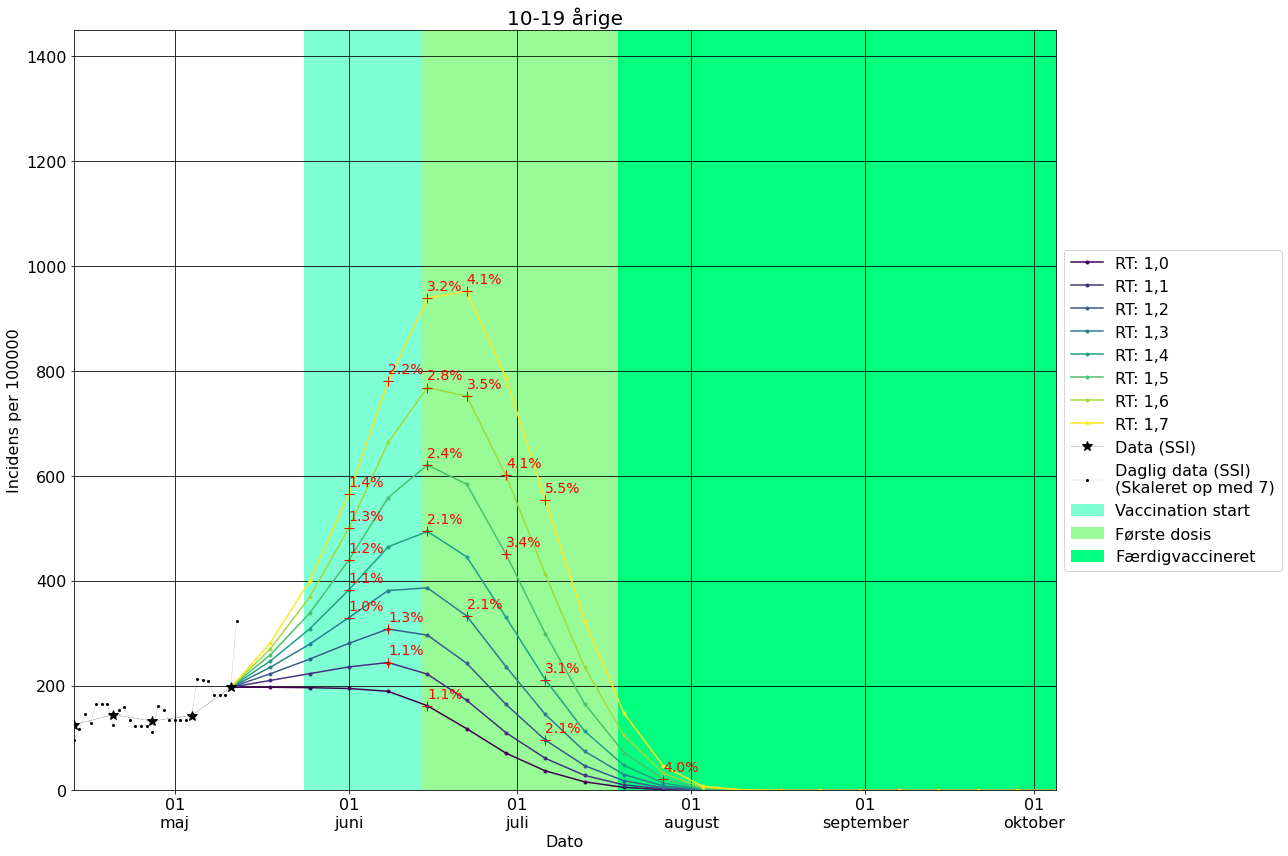

In [9]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

fig,ax1 = plt.subplots(1,1,figsize=(18,12))

# Decide which agegroup to show (see allCols list)
i = 1
curAge = allCols[i]
curPopSize = DK_age[i]

# Use latest day with data
tStart = plotDates[-1]

# Predict tEndWeeks forward
tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

# How much to show in plot
xLims = [tStart-tDelta*4,tSpanPlot[-1]]

# Get vaccination dates from calendar
vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

# Get data and initial condition
curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]

# Plot vaccination
#curMax = max(curData)
ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

# Generation time (4.7 days), in units of weeks 
genTime = 4.7 / 7 

# Go through a number of RT's
allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
cmap_prop = plt.cm.get_cmap('cividis',len(allRTs))
for k in range(0,len(allRTs)):
    curRT = allRTs[k]
    
    # Make prediction with current RT
    # modelCount = iniCount * (curRT**(genTime*tSpan))
    curLabel = f'RT: {curRT:.1f}'.replace('.',',')
    # ax1.plot(tSpanPlot,100000 * modelCount/curPopSize,'.-',#label=curLabel,
    #          linewidth=1.5,markersize=6,color=cmap(k), alpha=0.0)
    
    modelCount2 = predicted_cases(tSpanPlot, vaccKal['10-19'], curRT, 
                                  S0=curPopSize, init_count=iniCount, gen_time=genTime)
    ax1.plot(tSpanPlot,100000 * modelCount2/curPopSize,'.-',label=curLabel,
             linewidth=1.5,markersize=6,color=cmap(k))
    
    #pct_dots(ax1, tSpanPlot, modelCount2, curPopSize)

    modelCount2_cumul = modelCount2.cumsum()
    pct_list = list(range(0,11,1))
    for i in pct_list:
        for j, c in enumerate(modelCount2_cumul[:-1]/curPopSize):
            if c <= i/100 < modelCount2_cumul[j+1]/curPopSize:
                pct_str = f"{100*modelCount2_cumul[j+1]/curPopSize:.1f}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                
# Plot data
ax1.plot(plotDates,100000 * curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
# Also plot daily data, scaled up to weekly numbers
curDataDaily = dfCaseDiffDaily[curAge].values
ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=1450)
# ax1.set_yscale("log")

ax1.set_xlim(xLims)
# Readable dates on x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

ax1.set_title(curAge+' årige')
if (curAge == 'I alt'):
    ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458


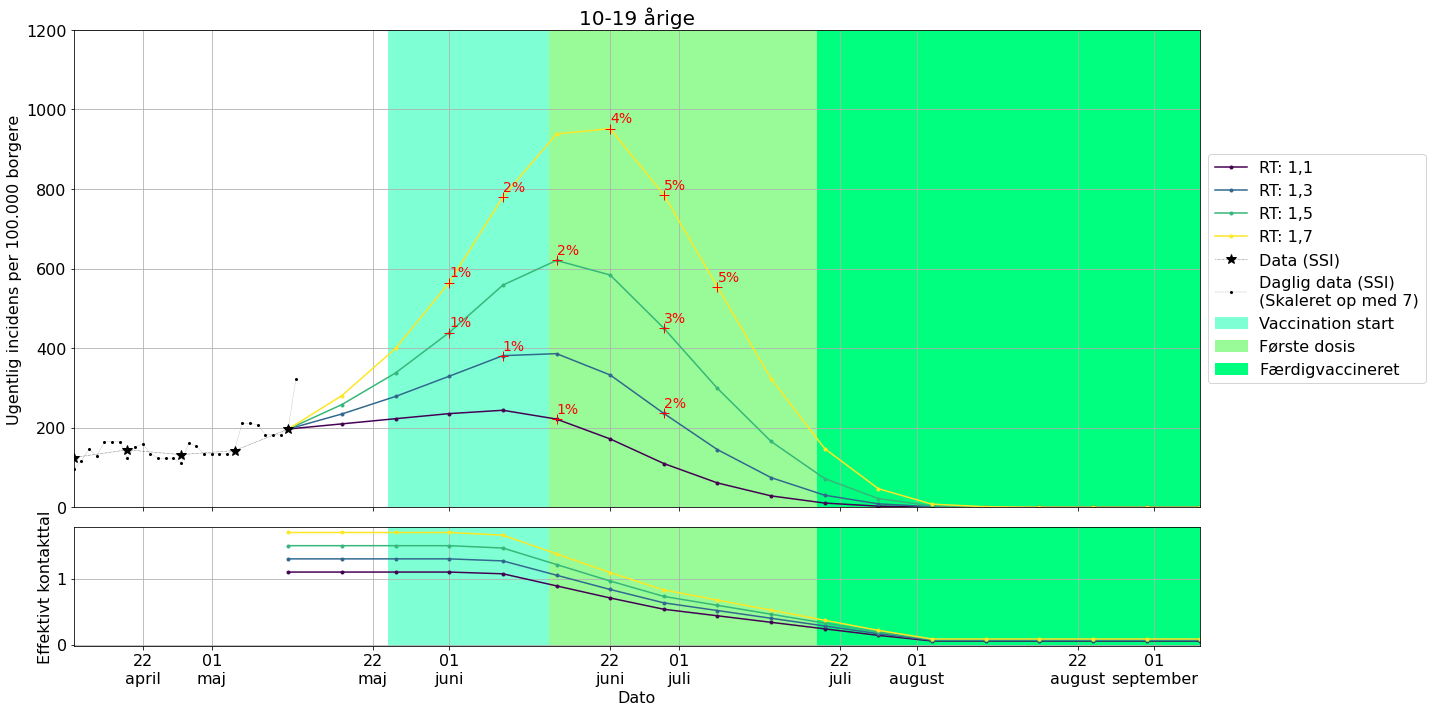

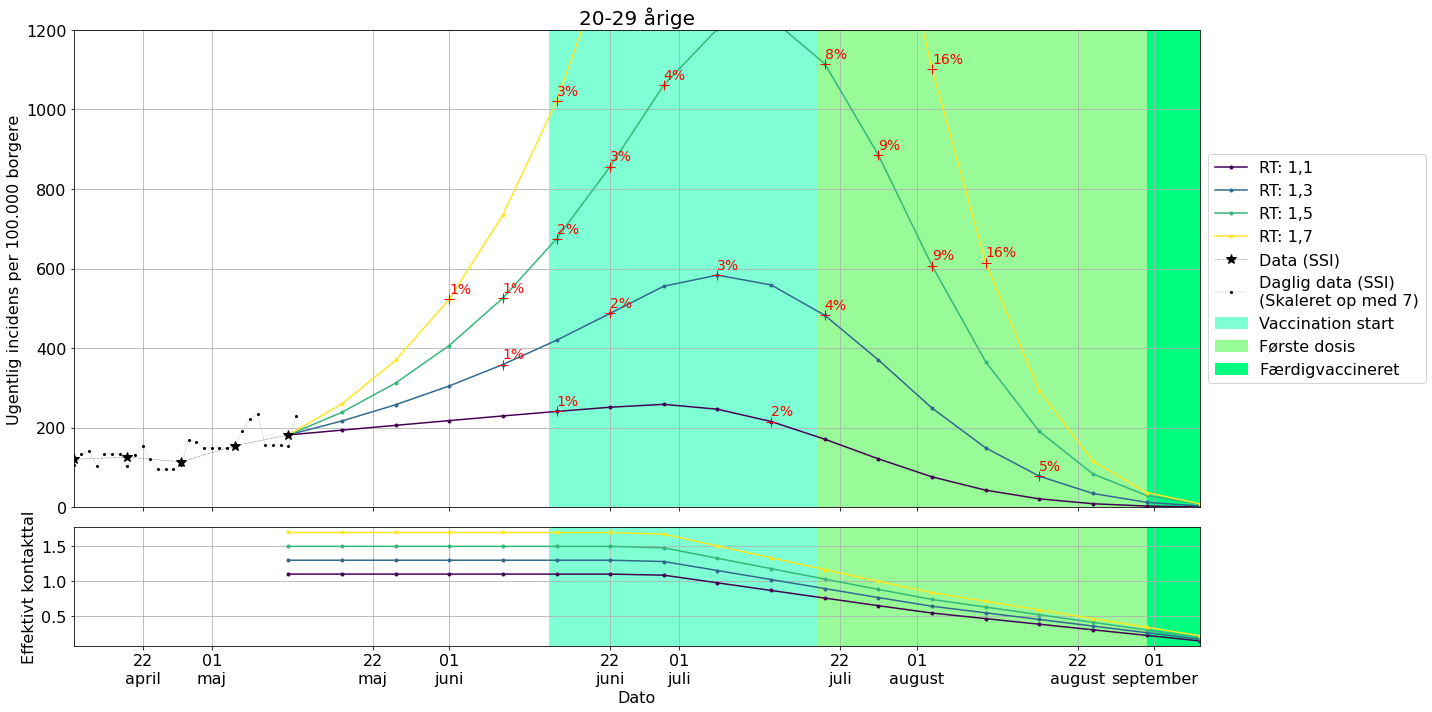

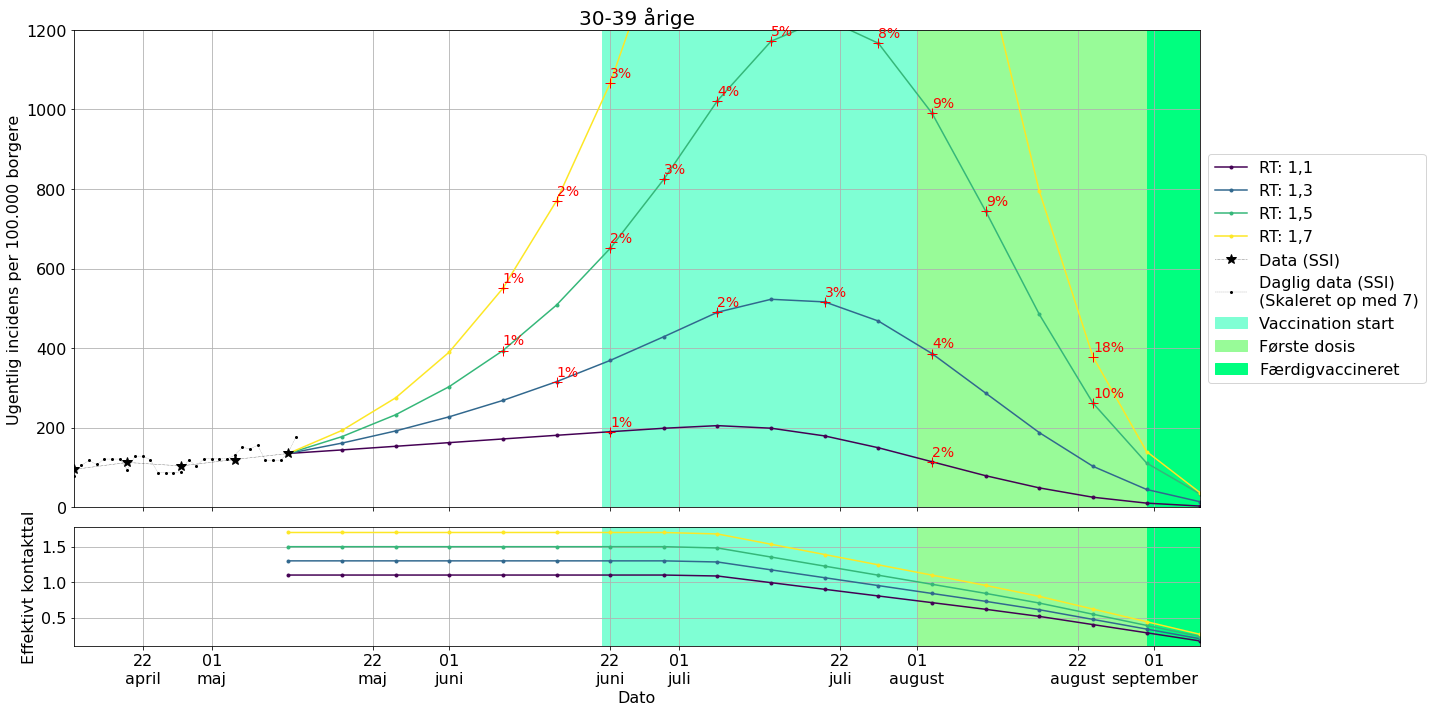

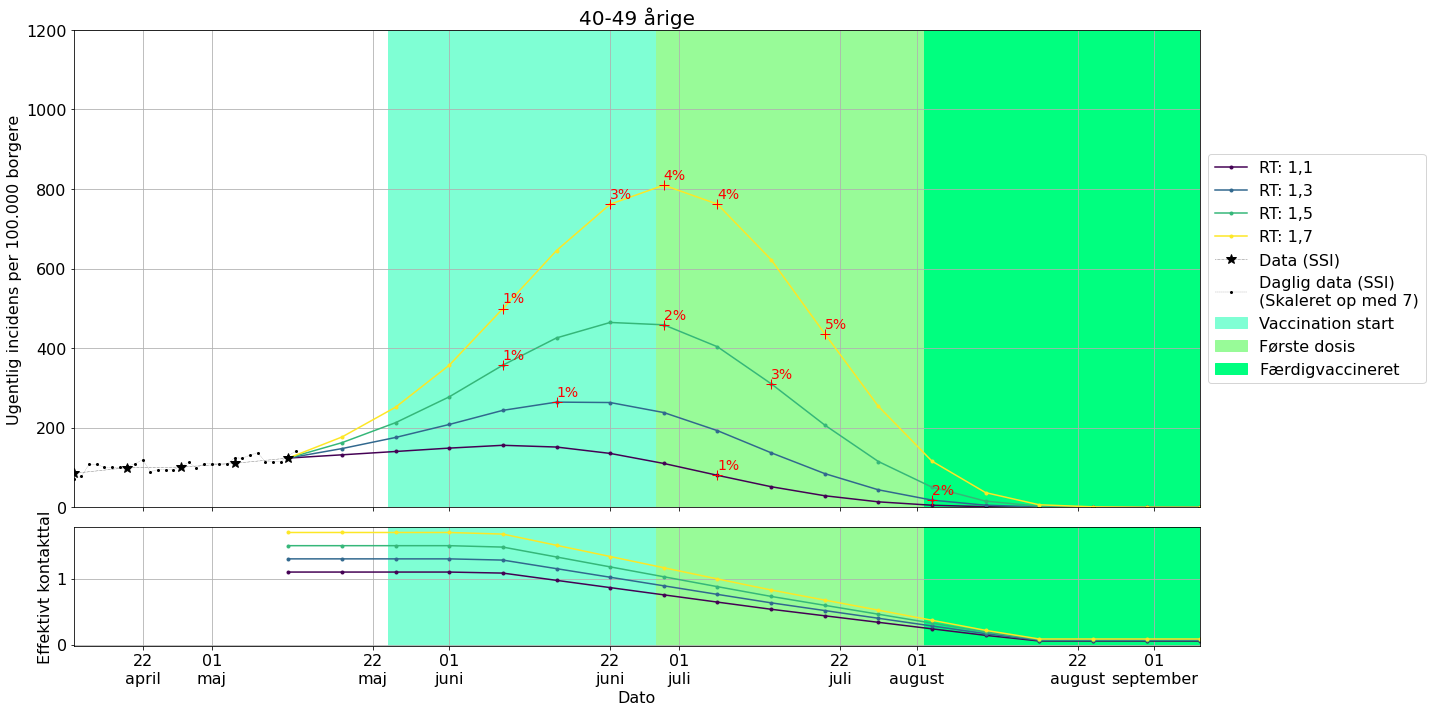

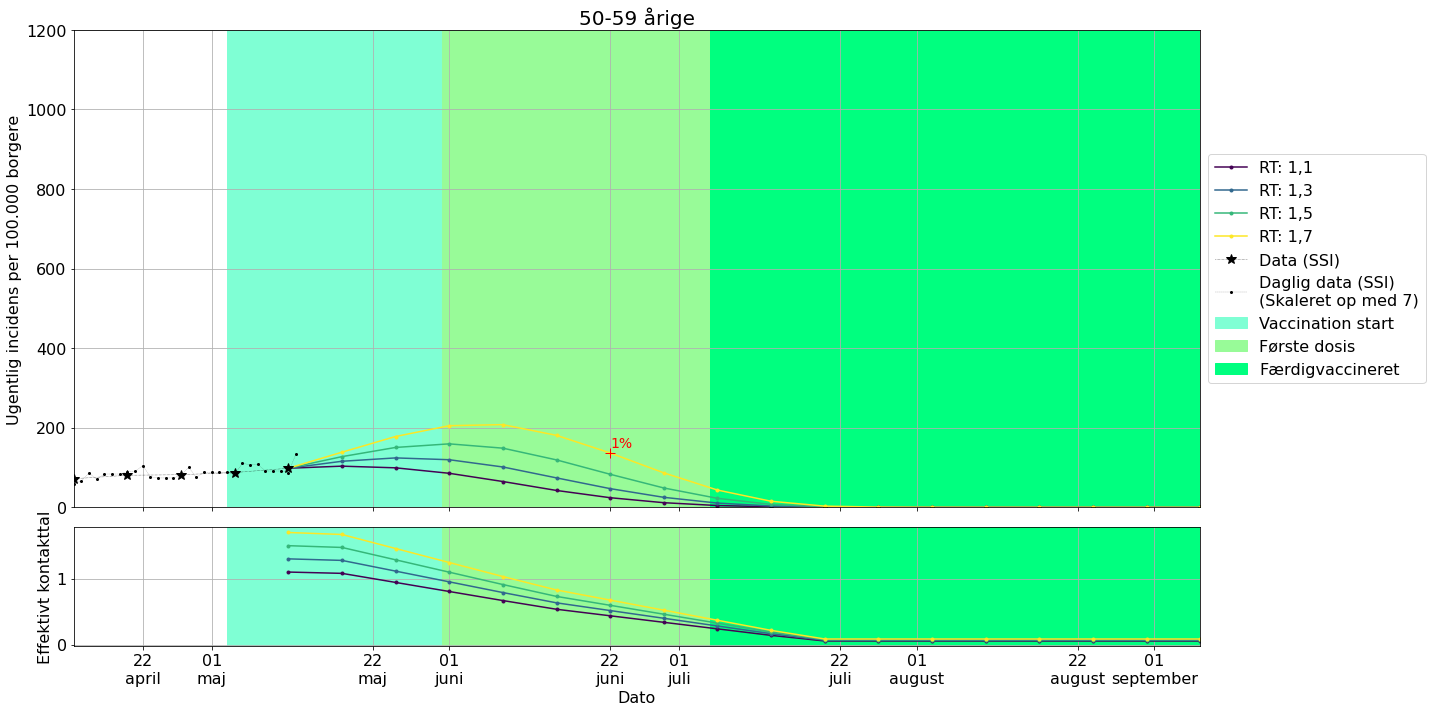

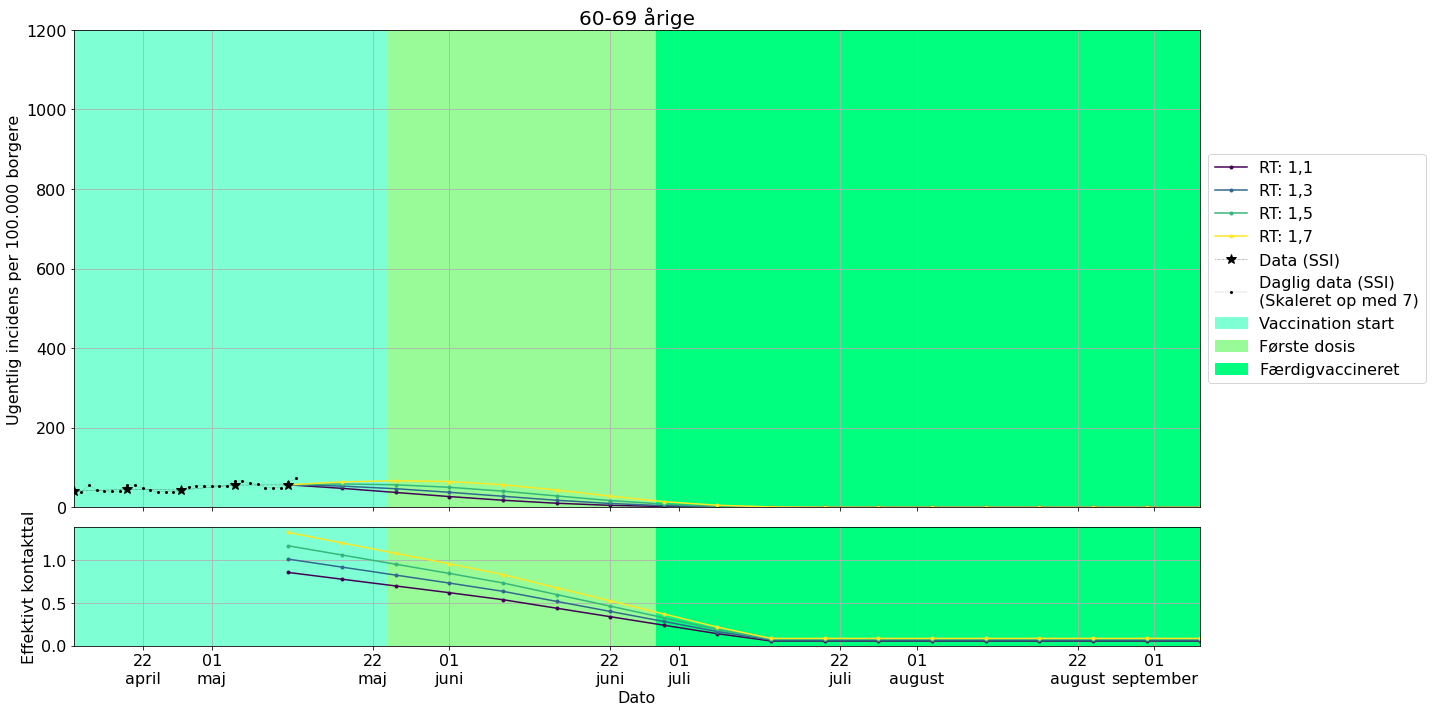

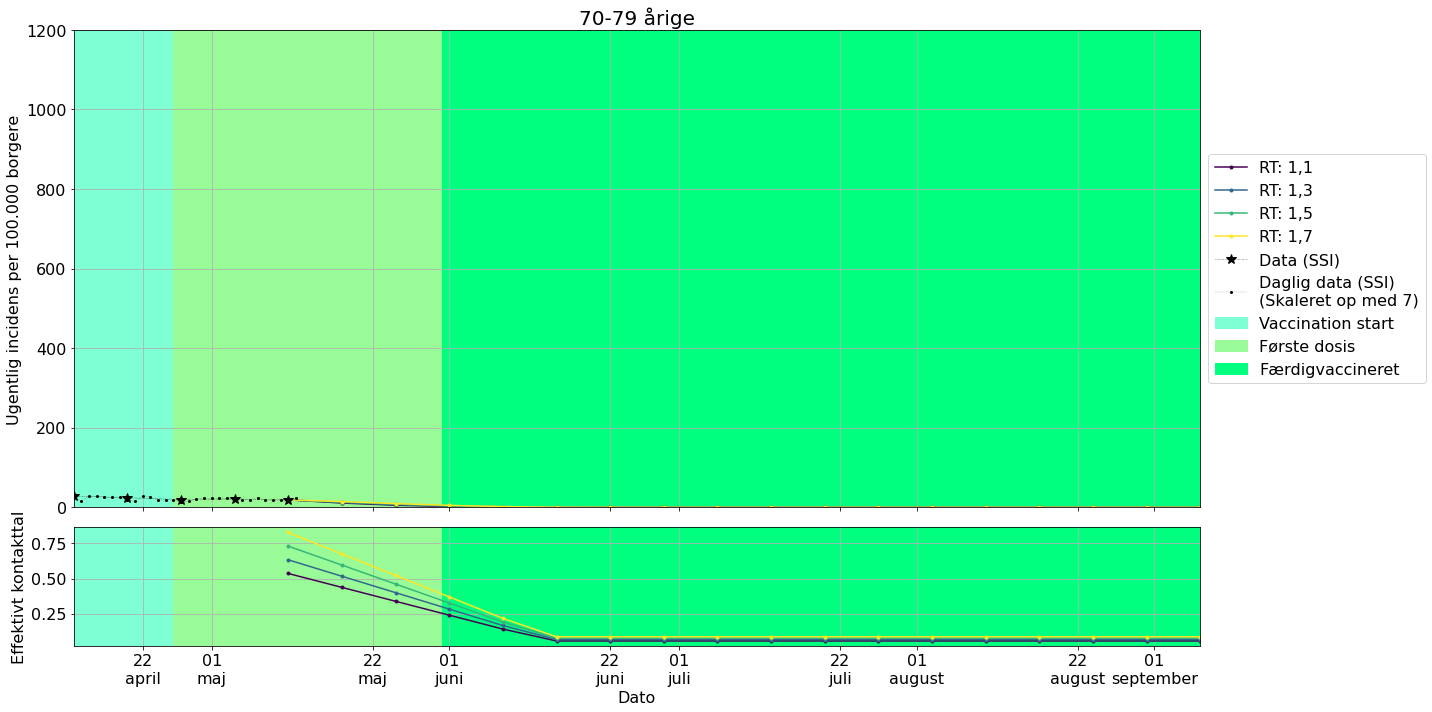

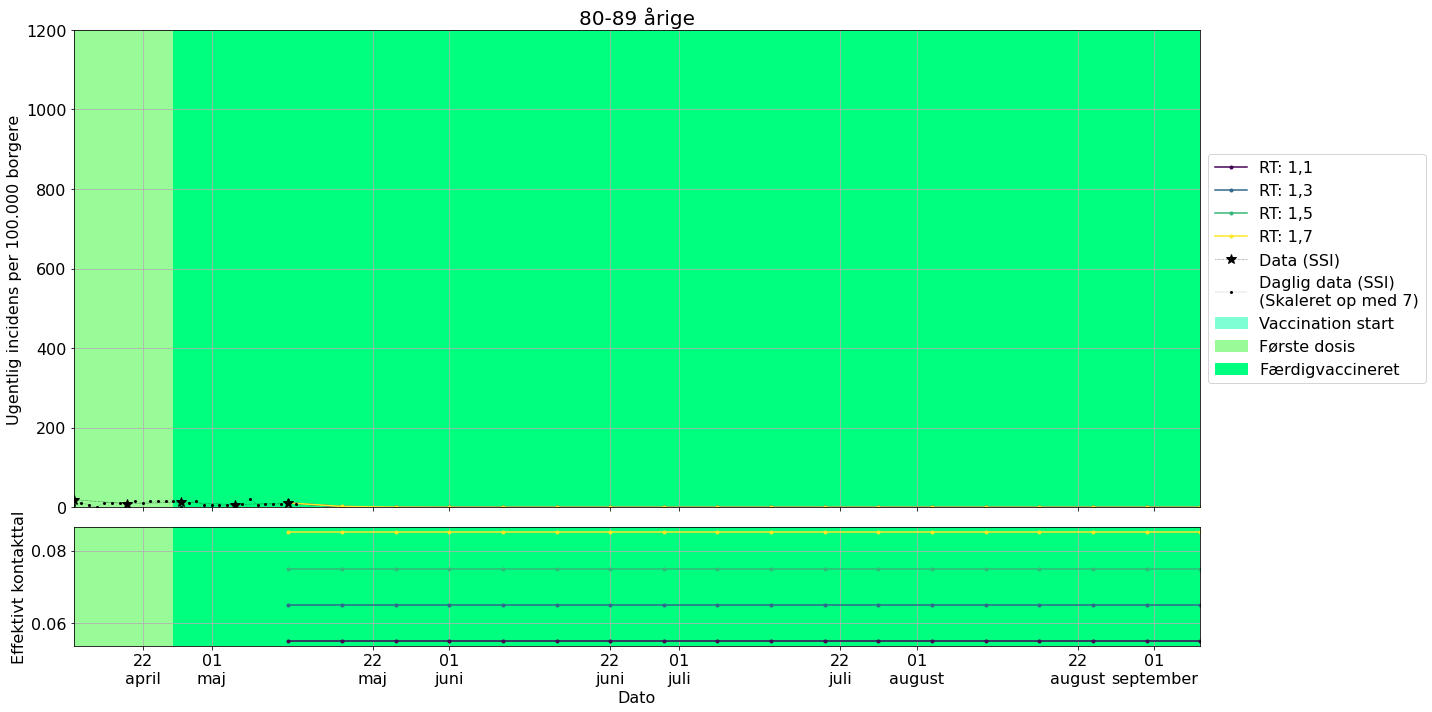

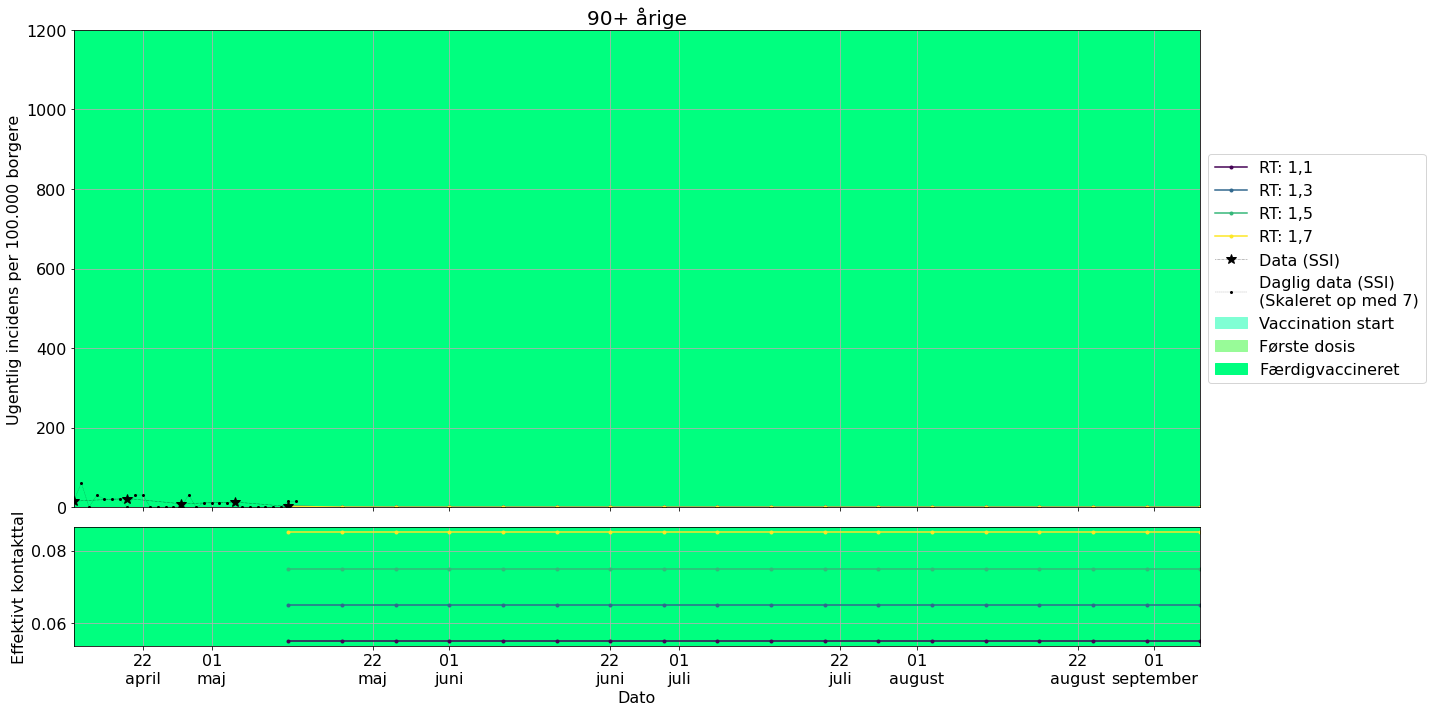

In [33]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

showMax = False

# tStart = np.datetime64('2021-04-27')
tStart = plotDates[-1]

tEndWeeks = 18
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

genTime = 4.7 / 7 # Generation time, in weeks
allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))


for i, col in enumerate(curCols[1:-1], 1):

    curAge = curCols[i]
    curPopSize = DK_age[i]
    print(curAge, curPopSize)

    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    curMax = 1200

    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True, gridspec_kw={"height_ratios":[4,1]})
    
    #fig2,ax2 = plt.subplots(1,1,figsize=(20,10))
    
    # this autofill for entire plt heigt...
    ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    #fig2,ax2 = plt.subplots(1,1,figsize=(20,4))
    ax2.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    ax2.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    ax2.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize, init_count=iniCount, gen_time=genTime)
        ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                 linewidth=1.5, markersize=6, color=cmap(k))
        
        ax2.plot(tSpanPlot, contact_number(tSpanPlot, vaccKal[curAge], curRT), '.-', 
             label=f'RT: {curRT:.1f}'.replace('.',','), linewidth=1.5, markersize=6, color=cmap(k))

        modelCount2_cumul = modelCount2.cumsum()
        rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

        pct_list = list(range(1,101,1))
        for i in pct_list:
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]
            for j, c in enumerate(rmc[:-1]/curPopSize):
                if (c <= i/100 < rmc[j+1]/curPopSize and 
                    100000*modelCount2[j+1]/curPopSize < curMax):
                    pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                    ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                    ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

    ax1.plot(plotDates, 100000*curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
    
    ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',
             linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')

    ax1.set_ylim(bottom = 0,top=curMax)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
    ax1.set_xlim(xLims)

    ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
    ax2.set_ylabel('Effektivt kontakttal')
    ax2.set_xlabel('Dato')

    ax1.grid()
    ax2.grid()


    ax1.set_title(curAge+' årige')    
    ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

    plt.tight_layout()

    if saveFigures:
        plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)

    

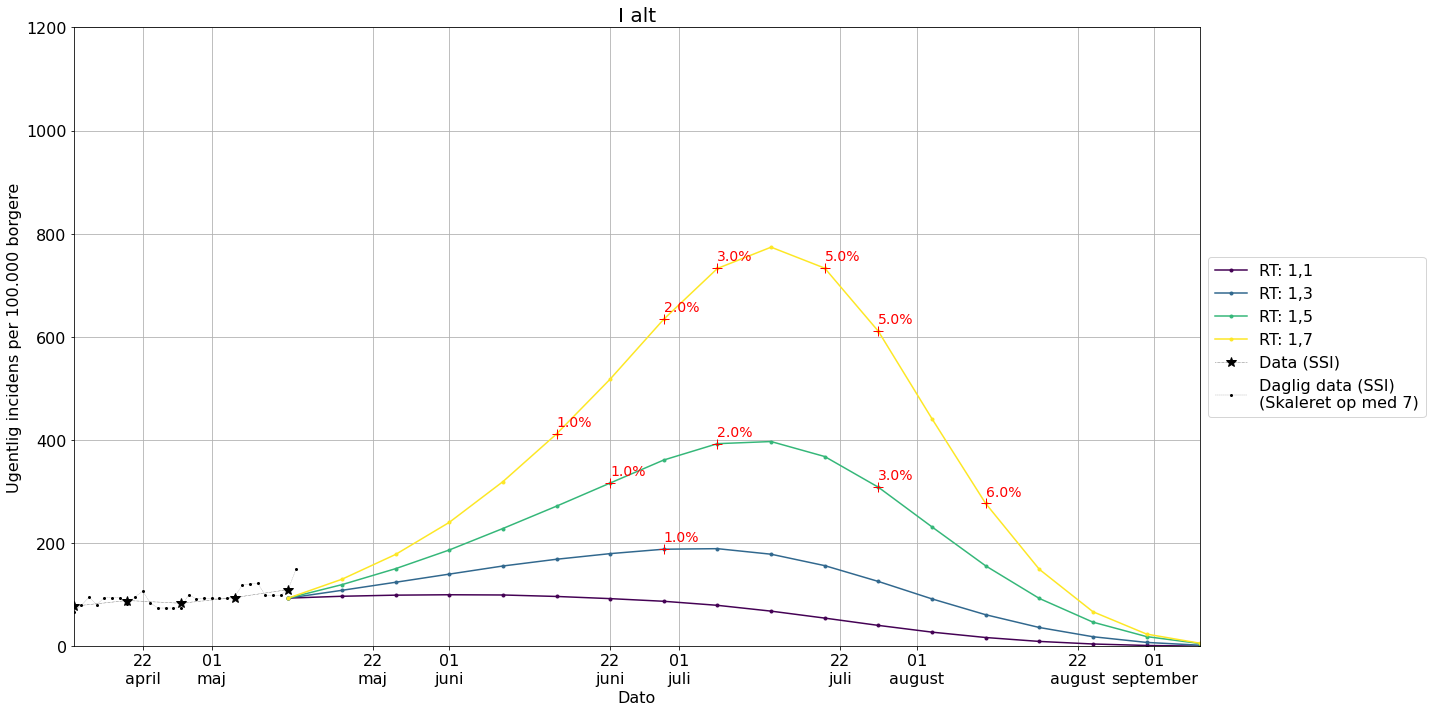

In [11]:
# Here comes the "I alt" plot

allRTs = np.arange(1.1,1.8,0.2)
genTime = 4.7 / 7 # Generation time, in weeks

tStart = plotDates[-1]
# print(tStart)

tEndWeeks = 18
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

curMax = 1200


weights = [l/DK_age[-1] for l in DK_age[:-1]]
modArray = []

for i in range(0,len(curCols[:-1])):
    curAge = curCols[i]
    curPopSize = DK_age[i]
    
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]


    # for curRT in allRTs:
    RTArray = []
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize, init_count=iniCount, gen_time=genTime)
        RTArray.append(modelCount2)
        
    modArray.append(RTArray)

RTmodels_avg = []
for i in range(0,len(allRTs)):
    avg_tmp = [len(curCols[1:-1])*sum([weights[j]*modArray[j][i][k] for j, col in enumerate(curCols[1:-1],1)])
               for k in range(len(tSpanPlot))]
    RTmodels_avg.append(avg_tmp)


i = 10
curAge = curCols[i]
curPopSize = DK_age[i]

curData = dfCaseDiff[curAge].values
curDataDaily = dfCaseDiffDaily[curAge].values
iniCount = iniRow[curAge].values[0]

RTmodels_avg = np.array(RTmodels_avg)

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

fig,ax1 = plt.subplots(1,1,figsize=(20,10))

for k in range(0,len(allRTs)):
    
    modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
    
    ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

    pct_list = list(range(1,101,1))
    for i in pct_list:
        for j, c in enumerate(rmc[:-1]/curPopSize):
            if c <= i/100 < rmc[j+1]/curPopSize and 100000*modelCount2[j+1]/curPopSize < curMax:
                pct_str = f"{round(100*rmc[j+1]/curPopSize,0)}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

ax1.plot(plotDates, 100000*curData/curPopSize, 'k*:', linewidth=0.5,label=f'Data (SSI)')

ax1.plot(plotDatesDaily, 100000*(curDataDaily*7)/curPopSize, 'k.:',
         linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=curMax)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
ax1.set_xlabel('Dato')

ax1.grid()

ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)
        

['2021-04-13' '2021-04-20' '2021-04-27' '2021-05-04' '2021-05-11'
 '2021-05-18' '2021-05-25' '2021-06-01' '2021-06-08' '2021-06-15'
 '2021-06-22' '2021-06-29' '2021-07-06' '2021-07-13' '2021-07-20'
 '2021-07-27' '2021-08-03' '2021-08-10' '2021-08-17' '2021-08-24'
 '2021-08-31' '2021-09-07']
10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458
I alt 5840045


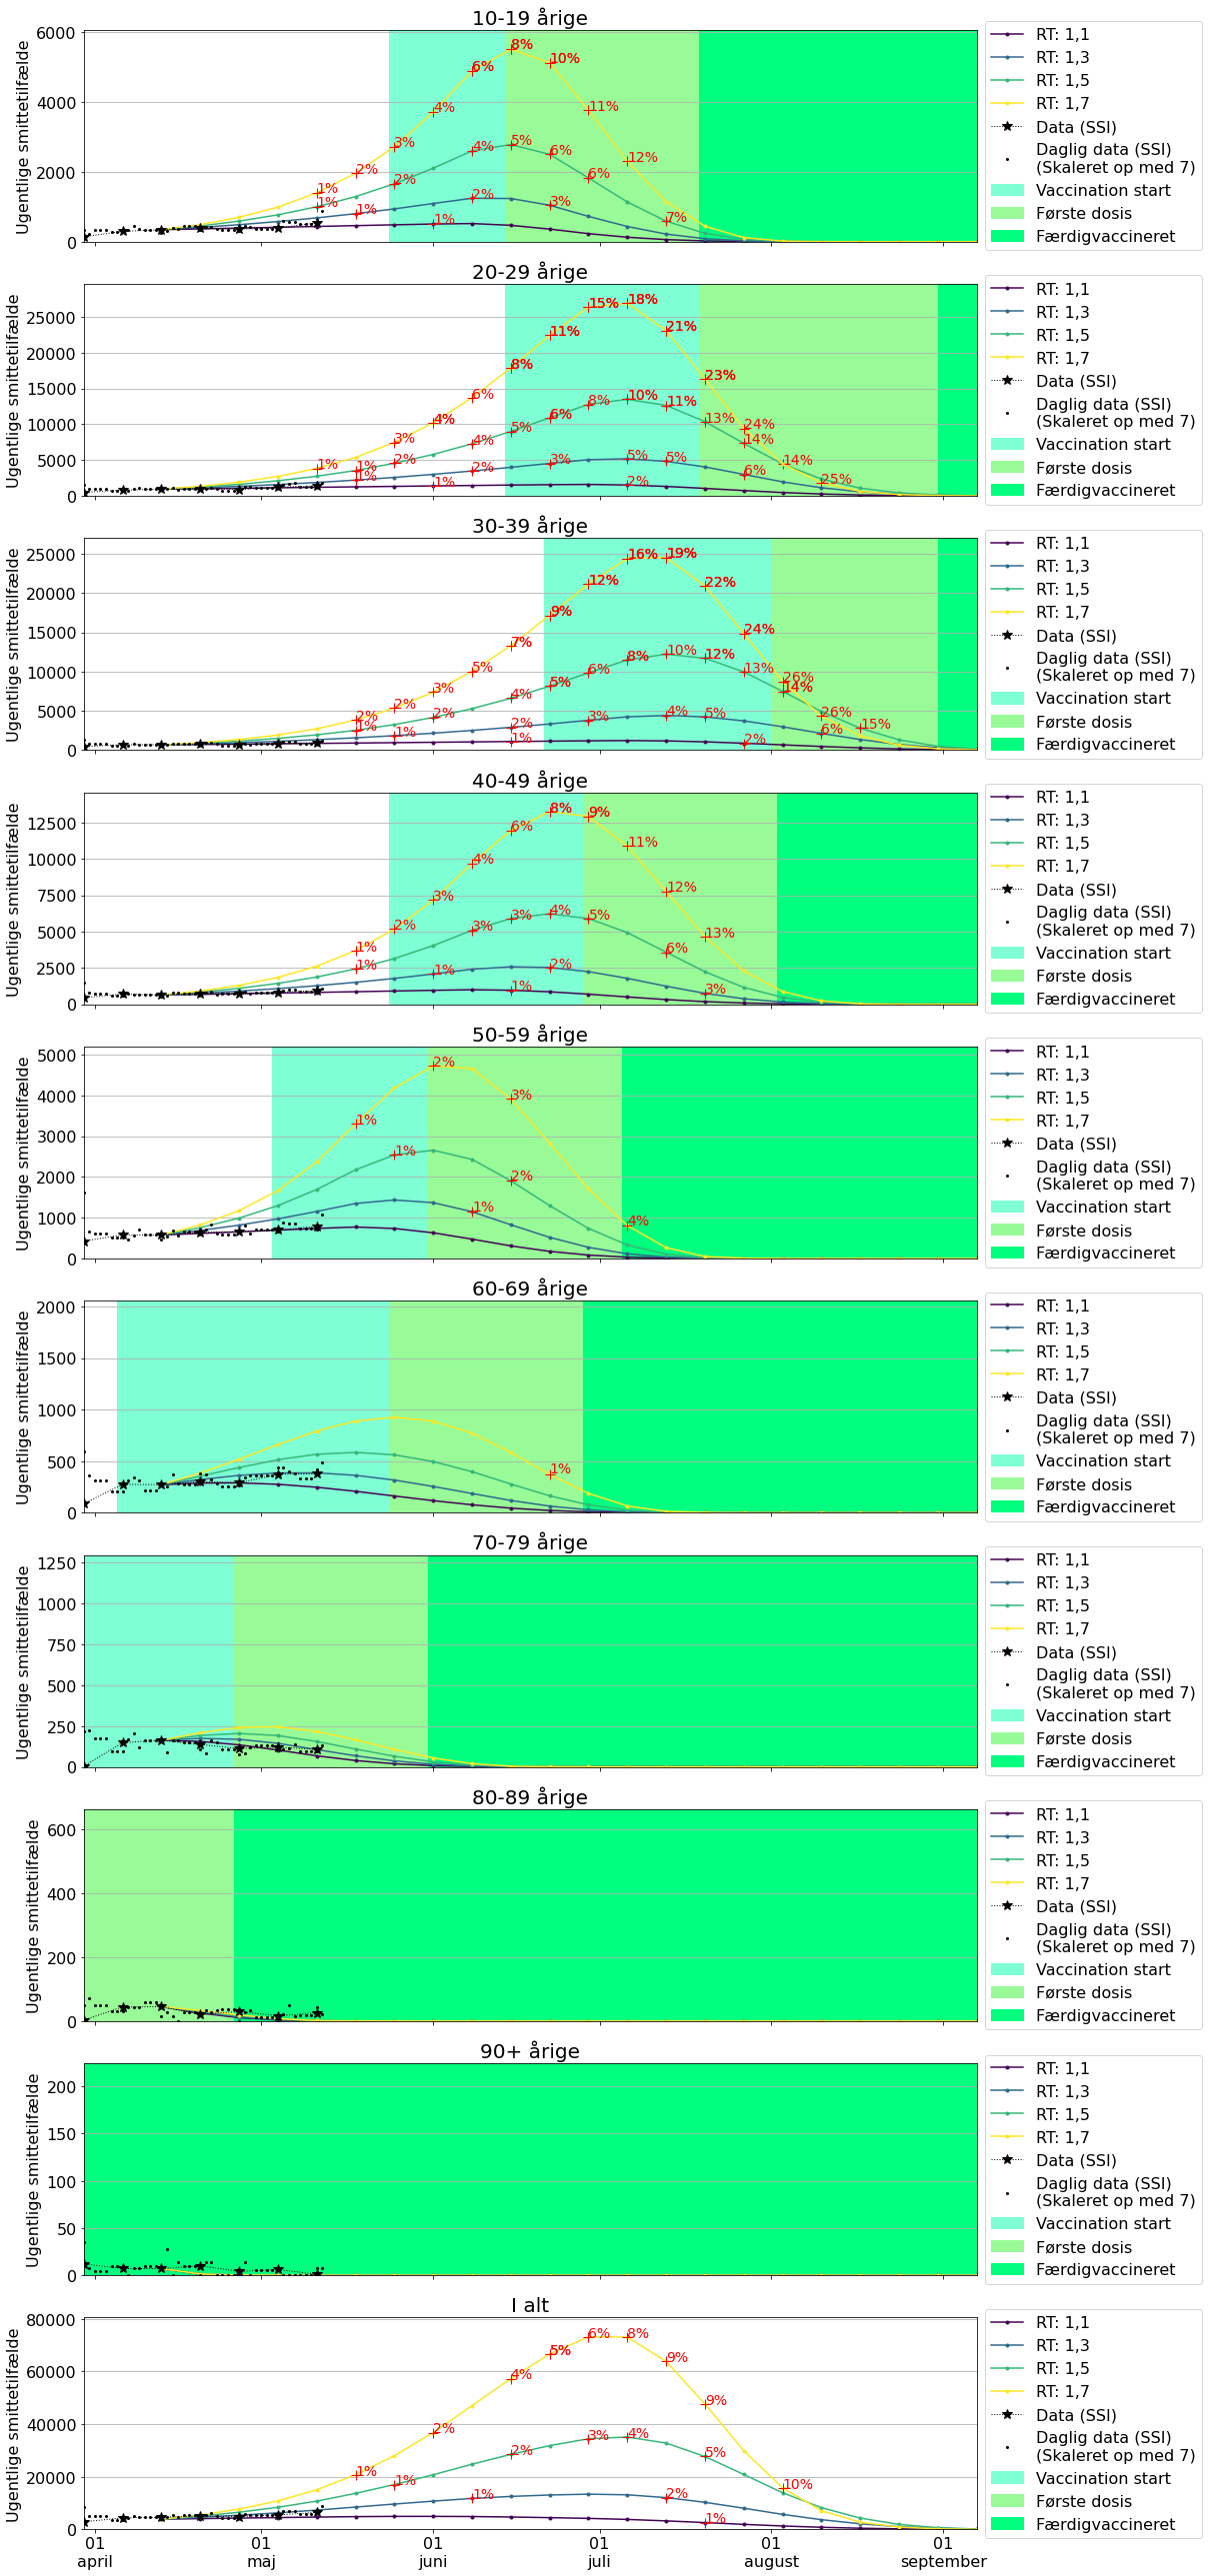

In [12]:
# Same thing, but in one large plot. Starting in the middle of april

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-04-13')
# tStart = plotDates[-1]
#print(tStart)

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

print(tSpanPlot)

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

modArray = []
for i, age in enumerate(allAges, 0):
        curAx = allAxes.flatten()[i]
        curAge = allAges[i]
        curPopSize = DK_age[1:][i]
        print(curAge, curPopSize)
        vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

        curData = dfCaseDiff[curAge].values
        curDataDaily = dfCaseDiffDaily[curAge].values

        iniCount = iniRow[curAge].values[0]

        dataMax = max(curData)

        curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
        curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
        curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

        curAx.set_title(curAge+' årige')
        if (curAge == 'I alt'):
            curAx.set_title(curAge)

        if age != "I alt":
            # for curRT in allRTs:
            RTArray = []
            for k in range(0,len(allRTs)):
                curRT = allRTs[k]

                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize, init_count=iniCount, gen_time=genTime)
                
                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                           linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                RTArray.append(modelCount2)
                
                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        if (c <= l/100 < rmc[j+1]/curPopSize) and (modelCount2[j+1] < top):
                            pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)

        elif age == "I alt":
            RTmodels_avg = []
            for i in range(0,len(allRTs)):
                avg_tmp = [len(allAges[:-1])*sum([weights[j]*modArray[j][i][k] 
                                                  for j, col in enumerate(allAges[:-1])]) 
                           for k in range(len(tSpanPlot))]
                RTmodels_avg.append(avg_tmp)
            RTmodels_avg = np.array(RTmodels_avg)

            for k in range(0,len(allRTs)):
                modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
                curAx.plot(tSpanPlot, modelCount2,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
                         linewidth=1.5,markersize=6,color=cmap(k))

                top = modelMax = max(modelCount2)*1.1
                
                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        if c <= l/100 < rmc[j+1]/curPopSize and modelCount2[j+1] < top:
                            pct_str = f"{int(round(100*rmc[j+1]/curPopSize,0))}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)


        #curAx.plot(curDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
        curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
        # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
        curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
                   linewidth=0.25, markersize=4)

        curAx.set_ylim(bottom=0, top=top)

        curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

        curAx.set_xlim(xLims)

        curAx.set_ylabel('Ugentlige smittetilfælde')
        # curAx.set_xlabel('Dato')

        # curAx.grid(color='black')
        curAx.grid(axis='y')

        # curAx.legend()
        curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')

# curDates    
#dfCaseDiff[curAge]

# Tables

Age  CaseHospRate Population      Start        End   RT         Count  \
0    10-19          0.01     273589 2021-05-11 2021-05-11  1.1  5.380000e+02   
1    10-19          0.01     273589 2021-05-11 2021-05-18  1.1  5.735543e+02   
2    10-19          0.01     273589 2021-05-11 2021-05-25  1.1  6.090533e+02   
3    10-19          0.01     273589 2021-05-11 2021-06-01  1.1  6.440272e+02   
4    10-19          0.01     273589 2021-05-11 2021-06-08  1.1  6.670715e+02   
5    10-19          0.01     273589 2021-05-11 2021-06-15  1.1  6.064214e+02   
6    10-19          0.01     273589 2021-05-11 2021-06-22  1.1  4.698898e+02   
7    10-19          0.01     273589 2021-05-11 2021-06-29  1.1  3.008605e+02   
8    10-19          0.01     273589 2021-05-11 2021-07-06  1.1  1.673543e+02   
9    10-19          0.01     273589 2021-05-11 2021-07-13  1.1  7.816042e+01   
10   10-19          0.01     273589 2021-05-11 2021-07-20  1.1  2.888511e+01   
11   10-19          0.01     273589 2021-05-11 2021-07-27  1.1  7.447804e+00   
12   10-19          0.01     273589 2021-05-11 2021-08-03  1.1  1.025989e+00   
13   10-19          0.01     273589 2021-05-11 2021-08-10  1.1  1.413295e-01   
14   10-19          0.01     273589 2021-05-11 2021-08-17  1.1  1.946793e-02   
15   10-19          0.01     273589 2021-05-11 2021-08-24  1.1  2.681674e-03   
16   10-19          0.01     273589 2021-05-11 2021-08-31  1.1  3.693960e-04   
17   10-19          0.01     273589 2021-05-11 2021-09-07  1.1  5.088366e-05   
18   10-19          0.01     273589 2021-05-11 2021-09-14  1.1  7.009137e-06   
19   10-19          0.01     273589 2021-05-11 2021-09-21  1.1  9.654967e-07   
20   10-19          0.01     273589 2021-05-11 2021-09-28  1.1  1.329955e-07   
21   10-19          0.01     273589 2021-05-11 2021-10-05  1.1  1.831990e-08   
22   10-19          0.01     273589 2021-05-11 2021-05-11  1.3  5.380000e+02   
23   10-19          0.01     273589 2021-05-11 2021-05-18  1.3  6.416336e+02   
24   10-19          0.01     273589 2021-05-11 2021-05-25  1.3  7.622203e+02   
..     ...           ...        ...        ...        ...  ...           ...   
855  I alt           NaN    5840045 2021-05-11 2021-09-21  1.5  6.209329e+00   
856  I alt           NaN    5840045 2021-05-11 2021-09-28  1.5  8.652915e-01   
857  I alt           NaN    5840045 2021-05-11 2021-10-05  1.5  1.205842e-01   
858  I alt           NaN    5840045 2021-05-11 2021-05-11  1.7  5.468776e+03   
859  I alt           NaN    5840045 2021-05-11 2021-05-18  1.7  7.602186e+03   
860  I alt           NaN    5840045 2021-05-11 2021-05-25  1.7  1.040981e+04   
861  I alt           NaN    5840045 2021-05-11 2021-06-01  1.7  1.403801e+04   
862  I alt           NaN    5840045 2021-05-11 2021-06-08  1.7  1.864966e+04   
863  I alt           NaN    5840045 2021-05-11 2021-06-15  1.7  2.405061e+04   
864  I alt           NaN    5840045 2021-05-11 2021-06-22  1.7  3.025912e+04   
865  I alt           NaN    5840045 2021-05-11 2021-06-29  1.7  3.704794e+04   
866  I alt           NaN    5840045 2021-05-11 2021-07-06  1.7  4.279252e+04   
867  I alt           NaN    5840045 2021-05-11 2021-07-13  1.7  4.519851e+04   
868  I alt           NaN    5840045 2021-05-11 2021-07-20  1.7  4.282275e+04   
869  I alt           NaN    5840045 2021-05-11 2021-07-27  1.7  3.567483e+04   
870  I alt           NaN    5840045 2021-05-11 2021-08-03  1.7  2.576595e+04   
871  I alt           NaN    5840045 2021-05-11 2021-08-10  1.7  1.618079e+04   
872  I alt           NaN    5840045 2021-05-11 2021-08-17  1.7  8.728379e+03   
873  I alt           NaN    5840045 2021-05-11 2021-08-24  1.7  3.924129e+03   
874  I alt           NaN    5840045 2021-05-11 2021-08-31  1.7  1.394079e+03   
875  I alt           NaN    5840045 2021-05-11 2021-09-07  1.7  3.509085e+02   
876  I alt           NaN    5840045 2021-05-11 2021-09-14  1.7  4.272354e+01   
877  I alt           NaN    5840045 2021-05-11 2021-09-21  1.7  5.199613e+00   
878  I 

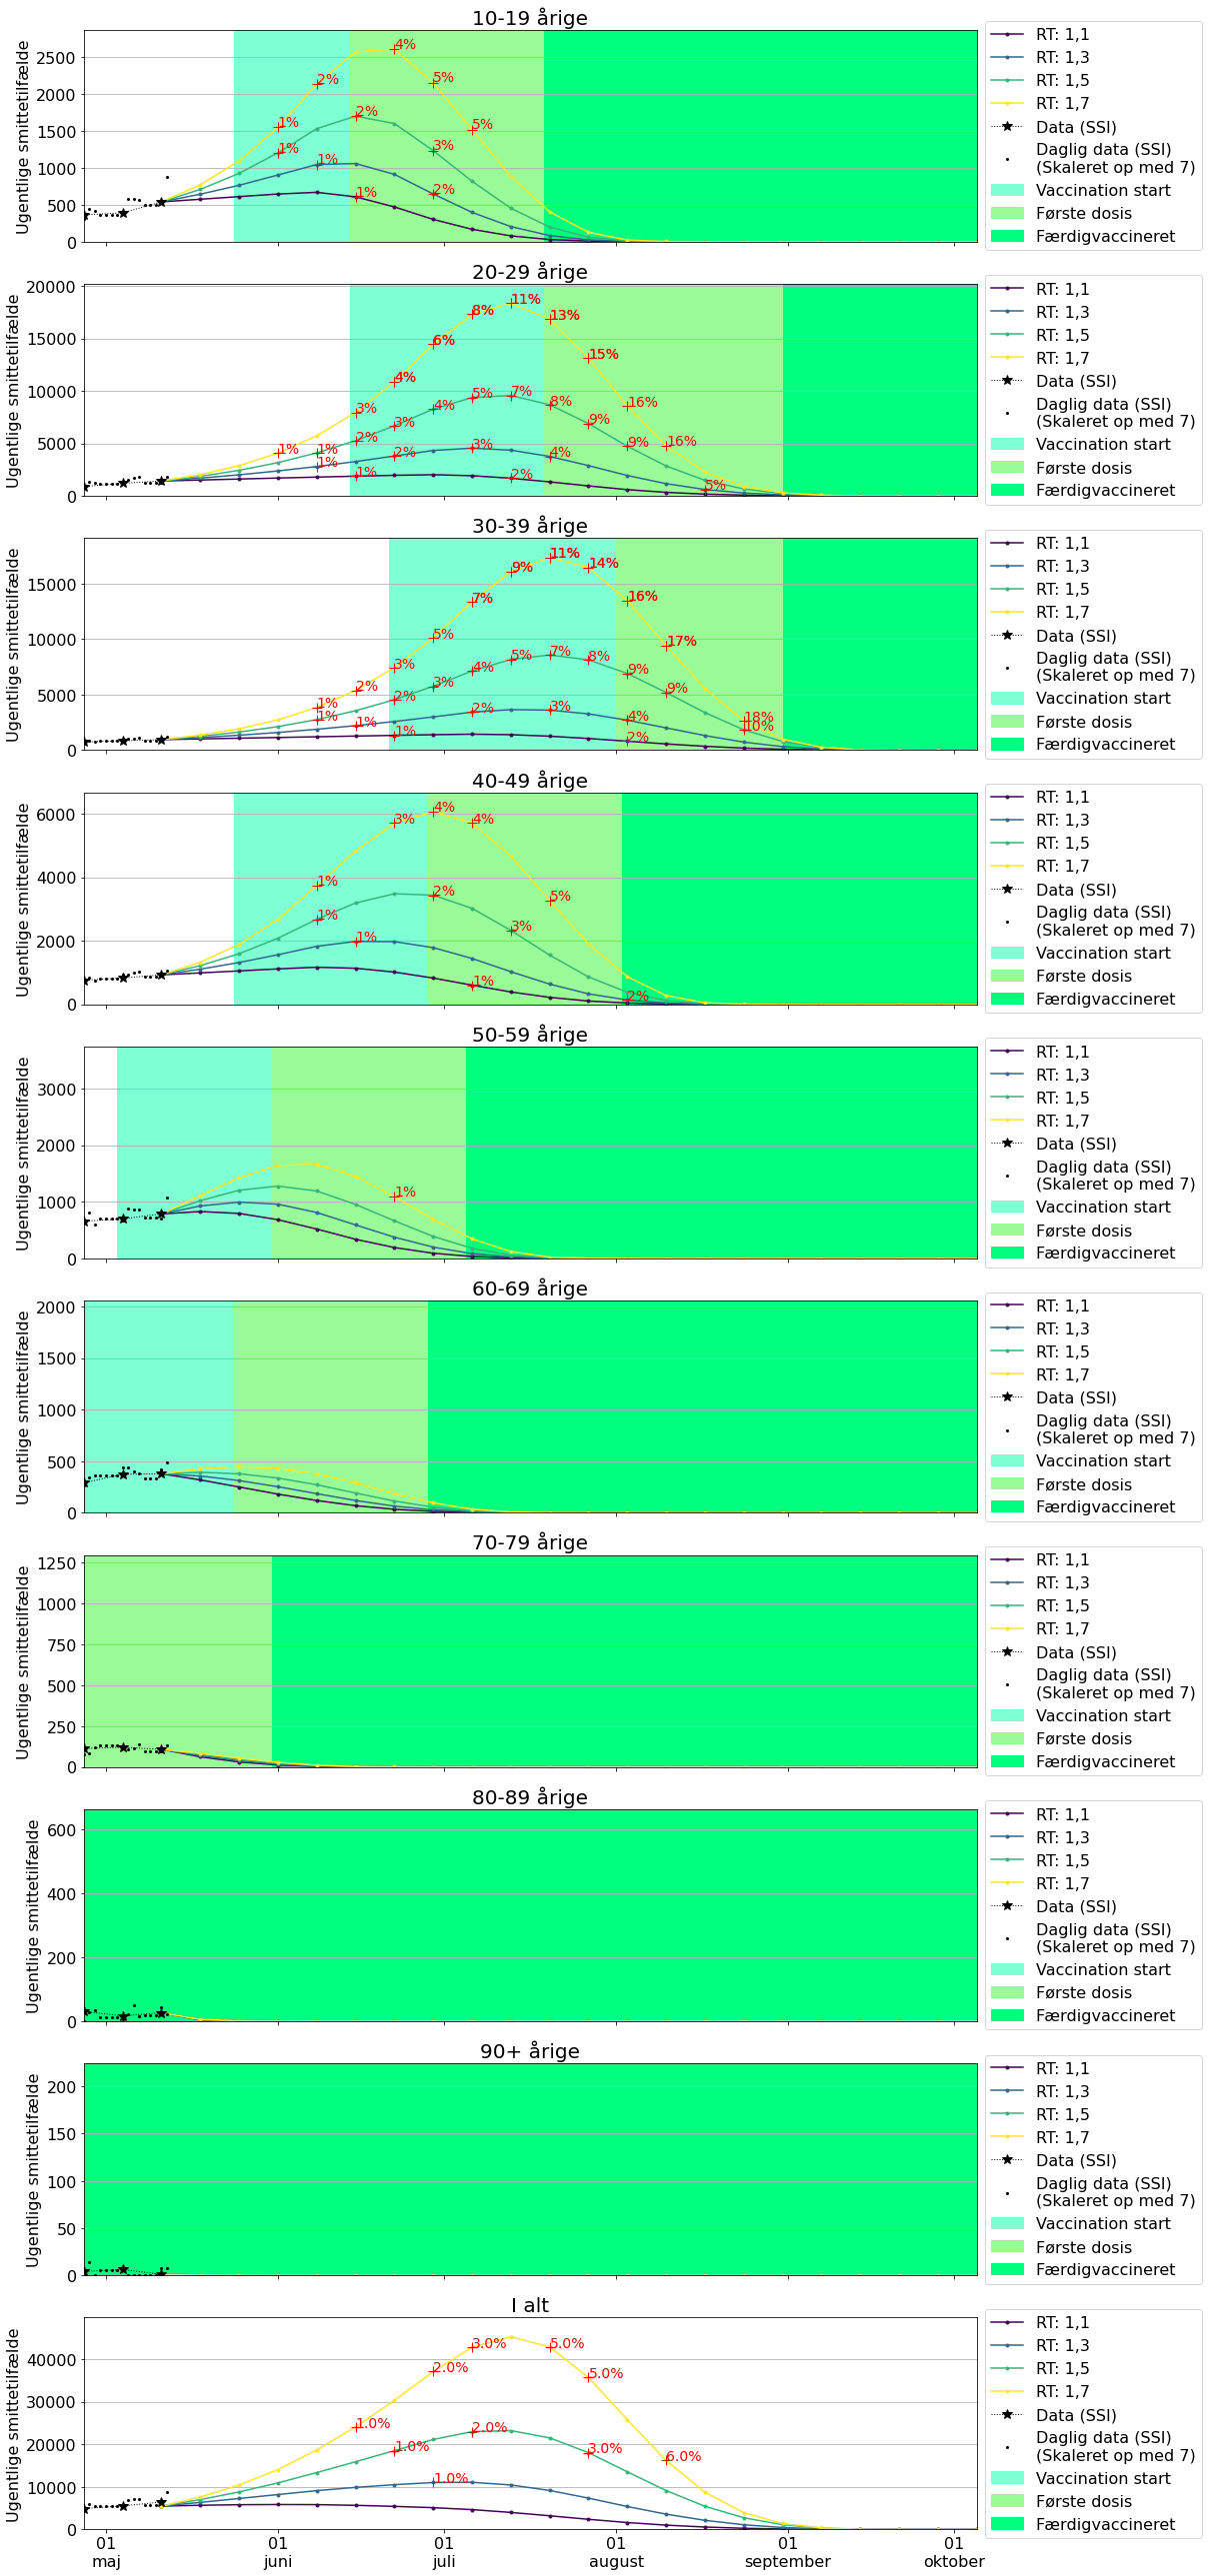

In [13]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]


modArray = []
for i, age in enumerate(allAges, 0):
    # print(i, age)
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]
    # print(curAge, curPopSize)
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    curAx.set_title(curAge+' årige')
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    if age != "I alt":
        # for curRT in allRTs:
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]

            modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                          S0=curPopSize, init_count=iniCount, gen_time=genTime)

            modelMax = max(modelCount2)
            top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

            curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                       linewidth=1.5, markersize=6, color=cmap(k))

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            RTArray.append(modelCount2)

            pct_list = list(range(1,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    if (c <= l/100 < rmc[j+1]/curPopSize) and (modelCount2[j+1] < top):
                        pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

        modArray.append(RTArray)

    elif age == "I alt":
        RTmodels_avg = []
        for i in range(0,len(allRTs)):
            avg_tmp = [len(allAges[:-1])*sum([weights[j]*modArray[j][i][k] 
                                              for j, col in enumerate(allAges[:-1])]) 
                       for k in range(len(tSpanPlot))]
            RTmodels_avg.append(avg_tmp)
        RTmodels_avg = np.array(RTmodels_avg)

        for k in range(0,len(allRTs)):
            curRT = allRTs[k]

            modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
            curAx.plot(tSpanPlot, modelCount2,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
                     linewidth=1.5,markersize=6,color=cmap(k))

            top = modelMax = max(modelCount2)*1.1

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':None, 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            pct_list = list(range(1,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    if c <= l/100 < rmc[j+1]/curPopSize and modelCount2[j+1] < top:
                        pct_str = f"{round(100*rmc[j+1]/curPopSize,0)}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)


    #curAx.plot(curDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df

In [14]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03"]))

table_cases = model_df.loc[filt, ["End", "Age", "RT", "CountCumul"]]
table_cases = pd.DataFrame(table_cases.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))

table_cases

## styg kommaerne.

CountCumul                                                           \
End      2021-06-29    2021-08-03    2021-06-29     2021-08-03    2021-06-29   
RT              1.1           1.1           1.3            1.3           1.5   
Age                                                                            
10-19   3870.877959   4153.751546   5959.399921    6669.297820   8886.225218   
20-29  12445.865742  18920.209837  20254.772158   37737.206075  31742.618139   
30-39   8366.744591  14269.005210  13672.443433   30278.920272  21530.375603   
40-49   7288.459577   8633.825013  11534.381794   15099.418165  17663.173488   
50-59   3447.268953   3492.732378   4855.561060    4969.419072   6698.192726   
60-69    975.438608    979.256735   1310.125256    1319.643529   1729.406372   
70-79    105.792140    105.793592    127.145126     127.148759    149.997285   
80-89      4.325510      4.325515      4.936386       4.936399      5.540260   
90+        0.166371      0.166371      0.189867       0.189868      0.213095   
I alt  39317.186964  55155.860210  62267.697197  105641.560469  95524.399423   

                                                    
End       2021-08-03     2021-06-29     2021-08-03  
RT               1.5            1.7            1.7  
Age                                                 
10-19   10422.946412   12861.428006   15812.564208  
20-29   70980.302857   47970.563052  122194.013686  
30-39   60400.906252   32719.934071  109423.534832  
40-49   25797.129532   26219.441261   42621.833225  
50-59    6947.889854    9075.824917    9570.987391  
60-69    1750.243628    2251.084757    2292.460488  
70-79     150.005270     174.474195     174.490124  
80-89       5.540288       6.140640       6.140697  
90+         0.213096       0.236189       0.236191  
I alt  194710.928498  142057.342305  334311.887094

In [15]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03"]))
#filt = (model_df["End"].isin(["2021-06-01", "2021-06-29"]))

table_hosp = model_df.loc[filt, ["End", "Age", "RT", "HospCumul"]]
table_hosp = pd.DataFrame(table_hosp.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))
table_hosp.loc['I alt',:] = table_hosp.sum(axis=0)

table_hosp

HospCumul                                                      \
End     2021-06-29   2021-08-03   2021-06-29   2021-08-03   2021-06-29   
RT             1.1          1.1          1.3          1.3          1.5   
Age                                                                      
10-19    38.708780    41.537515    59.593999    66.692978    88.862252   
20-29   248.917315   378.404197   405.095443   754.744122   634.852363   
30-39   334.669784   570.760208   546.897737  1211.156811   861.215024   
40-49   437.307575   518.029501   692.062908   905.965090  1059.790409   
50-59   275.781516   279.418590   388.444885   397.553526   535.855418   
60-69   126.807019   127.303376   170.316283   171.553659   224.822828   
70-79    23.274271    23.274590    27.971928    27.972727    32.999403   
80-89     1.730204     1.730206     1.974554     1.974560     2.216104   
90+       0.066548     0.066548     0.075947     0.075947     0.085238   
I alt  1487.263011  1940.524732  2292.433685  3537.689419  3440.699039   

                                               
End     2021-08-03   2021-06-29    2021-08-03  
RT             1.5          1.7           1.7  
Age                                            
10-19   104.229464   128.614280    158.125642  
20-29  1419.606057   959.411261   2443.880274  
30-39  2416.036250  1308.797363   4376.941393  
40-49  1547.827772  1573.166476   2557.309994  
50-59   555.831188   726.065993    765.678991  
60-69   227.531672   292.641018    298.019863  
70-79    33.001159    38.384323     38.387827  
80-89     2.216115     2.456256      2.456279  
90+       0.085238     0.094475      0.094476  
I alt  6306.364916  5029.631446  10640.894740

# OLD STUFF BELOW

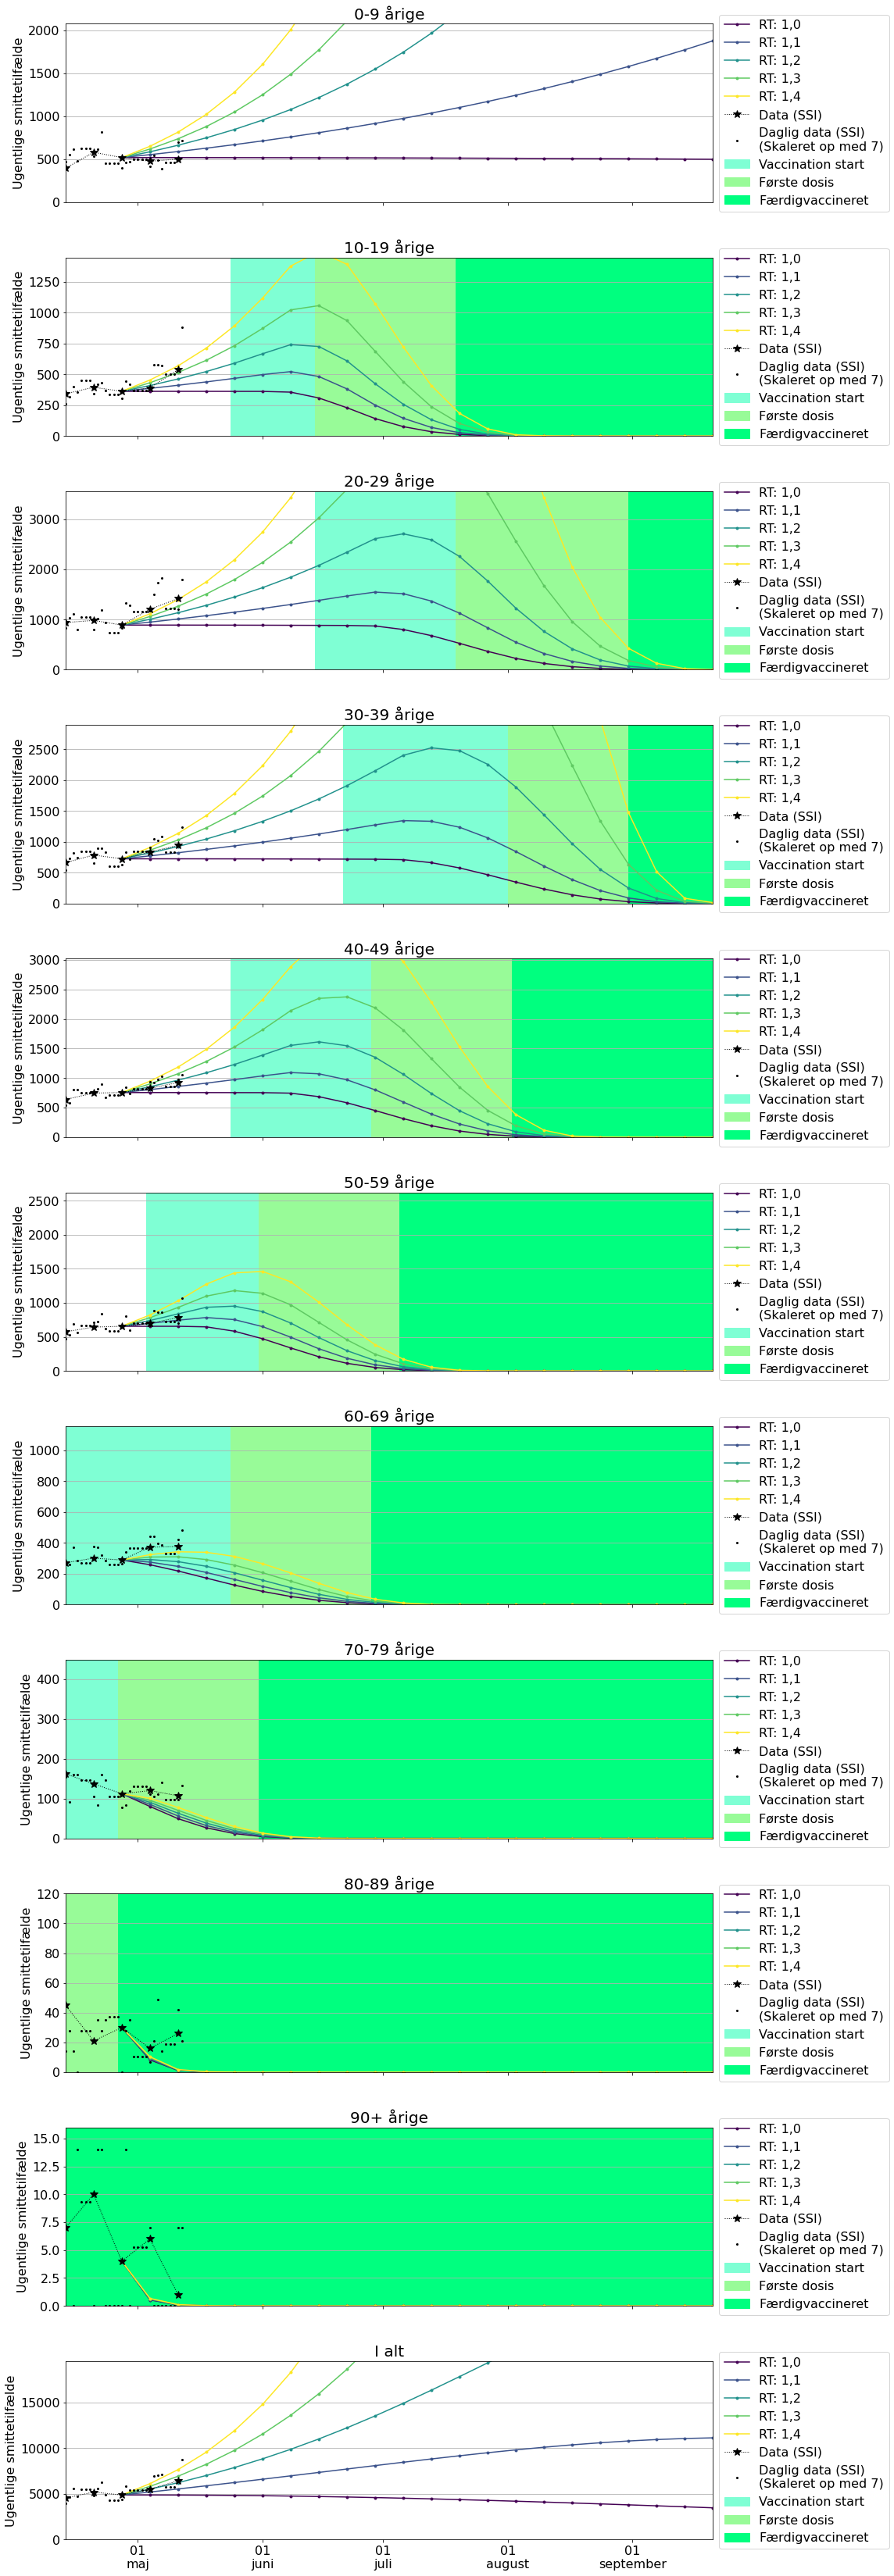

In [16]:
# Same thing, but in one plot, and starting at the end of april

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns


# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig,allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = False

tStart = np.datetime64('2021-04-27')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniRow


for i in range(0,len(allAges)):
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    # curAge = '30-39'
    # curAge = '40-49'
    # curAge = '50-59'
    # vaccIni = np.datetime64('2021-06-21')
    # vaccOne = np.datetime64('2021-08-01')
    # vaccTwo = np.datetime64('2021-08-31')
    
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)
    #max(dataMax, modelMax)
    top = int(showMax)*dataMax*1.1 + (1-int(showMax))*iniCount*4 


    # ax1.bar(vaccIni,max(curData),color='springgreen',label='Vaccination påbegyndes')
    # ax1.bar(vaccOne,max(curData),color='limegreen',label='Første dosis afsluttet')
    # ax1.bar(vaccTwo,max(curData),color='darkgreen',label='Forventet færdigvaccineret')

    # curAx.fill_between([vaccIni,vaccOne],[max(curData),max(curData)],color='springgreen',label='Vaccination start')
    # curAx.fill_between([vaccOne,vaccTwo],[max(curData),max(curData)],color='limegreen',label='Første dosis')
    # curAx.fill_between([vaccTwo,tSpanPlot[-1]],[max(curData),max(curData)],color='forestgreen',label='Færdigvaccineret')
    
    # curAx.fill_between([vaccIni,vaccOne],[max(curData),max(curData)],color='aquamarine',label='Vaccination start')
    # curAx.fill_between([vaccOne,vaccTwo],[max(curData),max(curData)],color='palegreen',label='Første dosis')
    # curAx.fill_between([vaccTwo,tSpanPlot[-1]],[max(curData),max(curData)],color='springgreen',label='Færdigvaccineret')

    curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    
    curAx.set_title(curAge+' årige')
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    genTime = 4.7 / 7 # Generation time, in weeks

    allRTs = np.arange(1.0,1.5,0.1)
    # allRTs = np.arange(1.0,1.4,0.1)

    lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

    cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount = iniCount * (curRT**(genTime*tSpan))
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize, init_count=iniCount, gen_time=genTime)

        modelSum = modelCount.sum()
        curAx.plot(tSpanPlot,modelCount,'.-',# label=f'RT: {curRT:.1f}'.replace('.',','),
                   linewidth=1.5,markersize=6,color=cmap(k), alpha=0)
        # curAx.plot(tSpanPlot,modelCount,'.-',label=f'Fremskrivning med RT: {curRT:.1f}'.replace('.',','),color=cmap(k))

        curAx.plot(tSpanPlot,modelCount2,'.-',label=f'RT: {curRT:.1f}'.replace('.',','),
                   linewidth=1.5,markersize=6,color=cmap(k))


    curAx.plot(plotDates,curData,'k*:',linewidth=1,markersize=10,label=f'Data (SSI)')
    # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
    curDataDaily = dfCaseDiffDaily[curAge].values
    curAx.plot(plotDatesDaily,curDataDaily*7,'k.',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')



    if showMax:
        curAx.plot(plotDates,dataMax * np.ones(curData.shape),color='grey',linewidth=1,label='Maksimalt antal smittede, anden bølge')
        
    curAx.set_ylim(bottom = 0,top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper_UltimoApril')


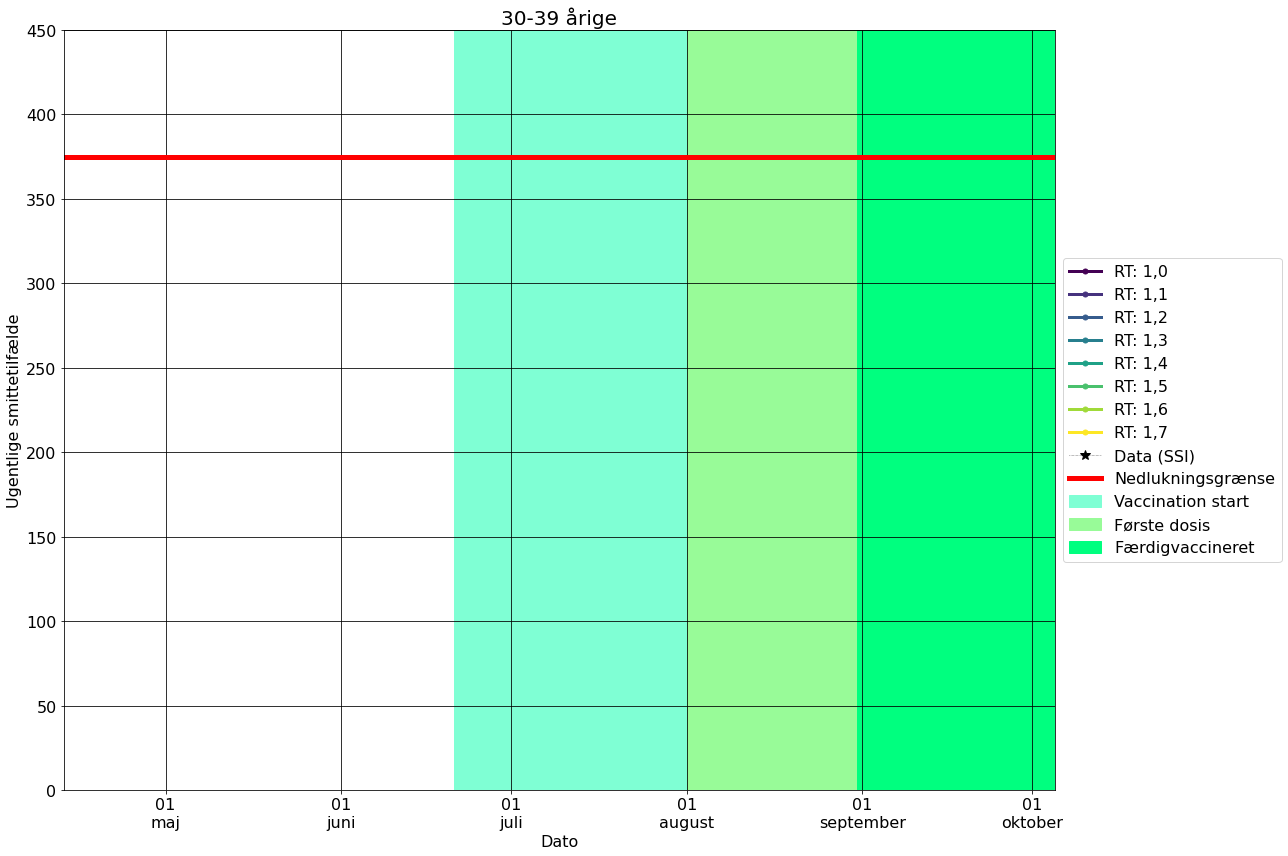

In [17]:


# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret
fig,ax1 = plt.subplots(1,1,figsize=(18,12))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = False

# plotDates is the dates used for plotting the data. Use the date of the last datapoint
tStart = plotDates[-1]

# Predict tEndWeeks forward
tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*4,tSpanPlot[-1]]



# curAge = '20-29'
curAge = '30-39'
# curAge = '40-49'
# curAge = '50-59'

# Get the vaccination days from calendar
vaccIni = vaccKal[curAge][0]
vaccOne = vaccKal[curAge][1]
vaccTwo = vaccKal[curAge][2]


curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]


# ax1.fill_between([vaccIni,vaccOne],[max(curData),max(curData)],color='aquamarine',label='Vaccination start')
# ax1.fill_between([vaccOne,vaccTwo],[max(curData),max(curData)],color='palegreen',label='Første dosis')
# ax1.fill_between([vaccTwo,tSpanPlot[-1]],[max(curData),max(curData)],color='springgreen',label='Færdigvaccineret')

ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

ax1.set_title(curAge+' årige')

genTime = 4.7 / 7 # Generation time, in weeks

lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap to use for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

for k in range(0,len(allRTs)):
    curRT = allRTs[k]
    
    modelCount = iniCount * (curRT**(genTime*tSpan))
    modelSum = modelCount.sum()

    ax1.plot(tSpanPlot,modelCount,'.-',label=f'RT: {curRT:.1f}'.replace('.',','),color=cmap(k))
    # ax1.plot(tSpanPlot,modelCount,'.-',label=f'Fremskrivning med RT: {curRT:.1f}'.replace('.',','),color=cmap(k))
    # ax1.plot(tSpanPlot,modelCount/7,'.-',label=f'RT: {curRT:.1f}'.replace('.',','),color=cmap(k))


ax1.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data (SSI)')
# ax1.plot(plotDates,curData/7,'k*:',linewidth=0.5,label=f'Data (SSI)')


ax1.plot([plotDates[0],tSpanPlot[-1]],[375,375],'r',linewidth=5,label='Nedlukningsgrænse')


if showMax:
    dataMax = max(curData)
    ax1.plot(plotDates,dataMax * np.ones(curData.shape),color='grey',linewidth=1,label='Maksimalt antal smittede\nAnden bølge')
    ax1.set_ylim(bottom = 0,top=dataMax*1.1)
else:
    # ax1.set_ylim(bottom = 0,top=iniCount*8/7)
    ax1.set_ylim(bottom = 0,top=450)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlige smittetilfælde')
# ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

# ax1.legend()
ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()


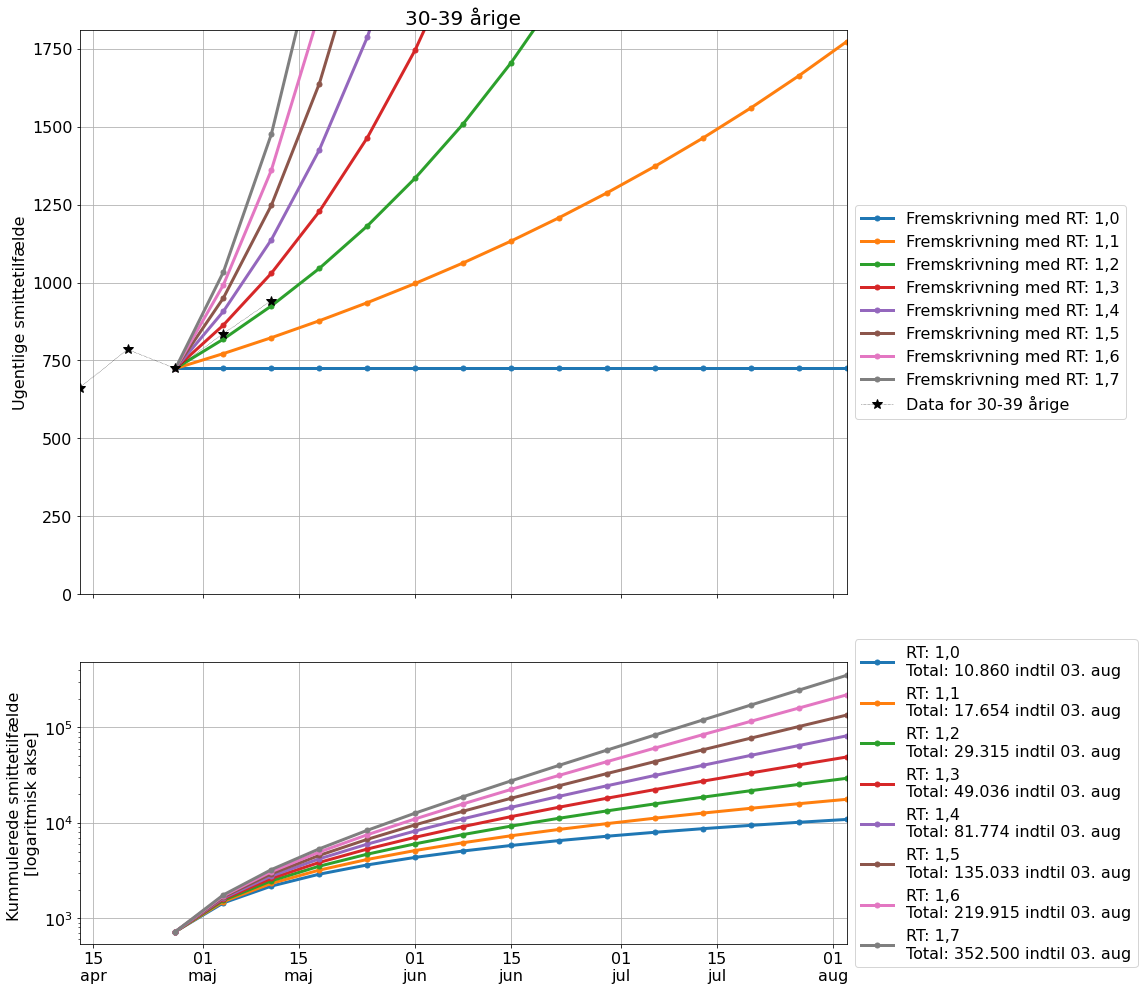

In [18]:
## First test plot to show methodology

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(16,14), gridspec_kw={'height_ratios': [2, 1]})

# Set which age to show
curAge = '30-39'

# Whether to display the maximal data so far
showMax = False

# tStart = np.datetime64('2021-04-13')
tStart = np.datetime64('2021-04-27')

# Number of weeks to go forward
tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

# Define the x limits to show
xLims = [tStart-tDelta*2,tSpanPlot[-1]]

curData = dfCaseDiff[curAge].values

# Find tStart in date-list, get data at the given date
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]

genTime = 4.7 / 7 # Generation time, in weeks

# Format the last date for showing in legend
lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

# Go through some RT's
minRT = 1.0
maxRT = 1.7
allRTs = np.arange(minRT,maxRT+0.1,0.1)

for curRT in allRTs:
    
    # Calculate prediction
    modelCount = iniCount * (curRT**(genTime*tSpan))
    # Plot prediction
    ax1.plot(tSpanPlot,modelCount,'.-',label=f'Fremskrivning med RT: {curRT:.1f}'.replace('.',','))

    # Summarize everything under the prediction curve
    modelSum = modelCount.sum()
    # Plot cummulative sum, and show final value in legend
    ax2.plot(tSpanPlot,np.cumsum(modelCount),'.-',label=f'RT: {curRT:.1f}'.replace('.',',')+f'\nTotal: {modelSum:,.0f} indtil {lastDateStr}'.replace(',','.')) 

# Plot the data
ax1.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')

# If flag is positive, plot the previously highest value in data
if showMax:
    dataMax = max(curData)
    ax1.plot(plotDates,dataMax * np.ones(curData.shape),color='grey',linewidth=1,label='Maksimalt antal smittede, anden bølge')
    ax1.set_ylim(bottom = 0,top=dataMax*1.1)
else:
    ax1.set_ylim(bottom = 0,top=iniCount*2.5)

# Readable dates in x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlige smittetilfælde')

ax2.set_yscale('log')
ax2.set_ylabel('Kummulerede smittetilfælde \n[logaritmisk akse]')

ax1.set_title(curAge+' årige')

ax1.grid()
ax2.grid()

# Legend outside plot
ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

In [19]:
# tSpan = np.arange(0,14)
# tSpan = np.arange(-4,14)


# curData = dfCaseDiff['20-29']
# # curData = dfCaseDiff['40-49']
# # curData = dfCaseDiff['I alt']
# iniCount = dfCaseDiff.iloc[-5,2]
# # iniCount = dfCaseDiff.iloc[-5,4]
# # iniCount = dfCaseDiff.iloc[-5,-1]
# firstDate = np.datetime64('2021-04-13')
# # iniCount = dfCaseDiff.iloc[-3,-1]
# # firstDate = np.datetime64('2021-04-27')
# # iniCount = dfCaseDiff.iloc[-1,-1]
# # firstDate = np.datetime64('2021-05-11')
# tSpanPlot = np.arange(firstDate,firstDate+np.timedelta64(7*14,'D'),np.timedelta64(7,'D'))
# tSpanPlot = np.arange(firstDate-np.timedelta64(7*4,'D'),firstDate+np.timedelta64(7*14,'D'),np.timedelta64(7,'D'))


# fig,ax1 = plt.subplots(1,1)

# genTime = 4.7 / 7

# curRT = 1.0
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.1
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.2
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.3
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.4
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 


# ax1.plot(plotDates,curData,'*-')
# # ax1.plot(plotDates,dfCaseDiff['I alt'],'k.--')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# # ax1.set_ylim(bottom = 0,top=max(curData))
# ax1.set_ylim(bottom = 0,top=iniCount*2)
# # ax1.set_xlim([tSpanPlot[0],tSpanPlot[-1]])
# ax1.set_xlim([tSpanPlot[0],np.datetime64('2021-06-01')])

# ax1.legend()

# plt.show()

In [20]:
a = np.array([2, 4, 7])
np.diff(a)

array([2, 3])